<a href="https://colab.research.google.com/github/vianelk/ai_financial_track/blob/main/AI_detect_financial_bankrupt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# AI DETECTION OF COMPAGNY'S BANKRUPT

In [ ]:
!pip install dataiku-api-client

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 311.1/311.1 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dataiku-api-client: filename=dataiku_api_client-13.4.1-py3-none-any.whl size=355713 sha256=50dfaab522128f2f17706815052bf24848e928f948a6d514e1e312a6eeb072c2
  Stored in directory: /root/.cache/pip/wheels/25/4e/e8/c5a2af4ea717e6b80141a390507cf2255b9b911b84af31783b
Successfully built dataiku-api-client


## IMPORT OF LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dataikuapi as dataiku

## IMPORT OF DATASET

In [ ]:
dataiku_url = 'https://dss-c8b1fb04-e440c9ef-dku.eu-west-3.app.dataiku.io/'
dataiku_api_key = 'dkuaps-9zHDQVbaVOXD18Rfp2Y3O15dbVV3az0E'
dataiku_project_name = 'AI_FINANCIAL_TRACK'
dataiku_dataset_name = 'data_filtered'

In [ ]:
def get_dataiku_project(dataiku_url, dataiku_api_key, project_name):
    external_client = dataiku.DSSClient(dataiku_url, dataiku_api_key)
    project = external_client.get_project(project_name)
    return project

In [ ]:
def get_dataiku_dataset(project, dataset_name):
    dataset = project.get_dataset(dataset_name)
    # R√©cup√©rer le sch√©ma pour obtenir les noms des colonnes
    schema = dataset.get_schema()
    column_names = [col['name'] for col in schema['columns']]
    # R√©cup√©rer les donn√©es ligne par ligne
    rows = []
    for row in dataset.iter_rows():
        rows.append(row)
    # Convertir les donn√©es en DataFrame avec les colonnes
    df = pd.DataFrame(rows, columns=column_names)

    return df

In [ ]:
projet = get_dataiku_project(dataiku_url, dataiku_api_key, dataiku_project_name)
df = get_dataiku_dataset(projet, dataiku_dataset_name)

df

net_income_to_total_assets  total_income_total_expense  \
0                       0.716845                    0.002022   
1                       0.795297                    0.002226   
2                       0.774670                    0.002060   
3                       0.739555                    0.001831   
4                       0.795016                    0.002224   
...                          ...                         ...   
6814                    0.799927                    0.002266   
6815                    0.799748                    0.002288   
6816                    0.797778                    0.002239   
6817                    0.811808                    0.002395   
6818                    0.815956                    0.002791   

      borrowing_dependency  retained_earnings_to_total_assets  \
0                 0.390284                           0.903225   
1                 0.376760                           0.931065   
2                 0.379093                           0.909903   
3                 0.379743                           0.906902   
4                 0.375025                           0.913850   
...                    ...                                ...   
6814              0.373823                           0.925611   
6815              0.372505                           0.932629   
6816              0.369637                           0.932000   
6817              0.369649                           0.939613   
6818              0.370049                           0.938005   

      total_debt_total_net_worth  bankrupt  
0                       0.021266       1.0  
1                       0.012502       1.0  
2                       0.021248       1.0  
3                       0.009572       1.0  
4                       0.005150       1.0  
...                          ...       ...  
6814                    0.006655       0.0  
6815                    0.004623       0.0  
6816                    0.001392       0.0  
6817                    0.003816       0.0  
6818                    0.000461       0.0  

[6819 rows x 6 columns]

## DATA TRANSFORMATION


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   net_income_to_total_assets         6819 non-null   float64
 1   total_income_total_expense         6819 non-null   float64
 2   borrowing_dependency               6819 non-null   float64
 3   retained_earnings_to_total_assets  6819 non-null   float64
 4   total_debt_total_net_worth         6819 non-null   float64
 5   bankrupt                           6819 non-null   float64
dtypes: float64(6)
memory usage: 319.8 KB


### FIABALITE DE LA DONNEE: VERIFICATION



In [ ]:
#V√©rification de valeurs nulles dans le dataset
df.isnull().sum()

net_income_to_total_assets           0
total_income_total_expense           0
borrowing_dependency                 0
retained_earnings_to_total_assets    0
total_debt_total_net_worth           0
bankrupt                             0
dtype: int64

In [ ]:
#Recherche de colonne en double
df.duplicated().sum()

0

In [ ]:
# Recherche de valeur NAN
[print(col) for col in df if df[col].isna().sum() > 0]

[]

## DATA EXPLORATION

**X86 - Net Income to Total Assets (Rentabilit√© des actifs)**
<br>‚Üí Mesure le profit net par rapport aux actifs.
<br>‚úî √âlev√© = Bonne rentabilit√© et efficacit√©.
<br>‚úñ Faible/N√©gatif = Risque de faillite.

<br>**X69 - Total income / Total expense (Revenus / D√©penses)**
<br>‚Üí Compare les revenus aux d√©penses.
<br>‚úî > 1 = Entreprise viable.
<br>‚úñ < 1 = D√©penses sup√©rieures aux revenus, risque de pertes.

<br>**X40 - Borrowing dependency (D√©pendance aux emprunts)**
<br>‚Üí Indique la part des co√ªts financiers li√©e aux emprunts.
<br>‚úî Faible = Moins de risque financier.
<br>‚úñ √âlev√© = Forte d√©pendance, risque accru en cas de baisse de revenus.

<br**>X68 - Retained Earnings to Total Assets (B√©n√©fices non r√©partis / Actifs)**
<br>‚Üí Montre combien des actifs sont financ√©s par les b√©n√©fices pass√©s.
<br>‚úî √âlev√© = Stabilit√© financi√®re.
<br>‚úñ Faible = Forte d√©pendance aux emprunts/investisseurs.

<br>**X36 - Total debt / Total net worth (Ratio d‚Äôendettement)**
<br>‚Üí Compare la dette totale aux fonds propres.
<br>‚úî Faible = Bonne solidit√© financi√®re.
<br>‚úñ √âlev√© = Flexibilit√© financi√®re r√©duite, risque accru en cas de crise.

In [ ]:
# S√©lection des colonnes d'int√©r√™t avec les nouveaux noms
selected_columns = [
    "net_income_to_total_assets",
    "total_income_total_expense",
    "borrowing_dependency",
    "retained_earnings_to_total_assets",
    "total_debt_total_net_worth"
]

df_selected = df[selected_columns]

In [ ]:
# Affichage des statistiques descriptives
stats_desc = df_selected.describe()
print("Statistiques descriptives :\n", stats_desc)

Statistiques descriptives :
        net_income_to_total_assets  total_income_total_expense  \
count                 6819.000000                 6819.000000   
mean                     0.807760                    0.002549   
std                      0.040332                    0.012093   
min                      0.000000                    0.000000   
25%                      0.796750                    0.002236   
50%                      0.810619                    0.002336   
75%                      0.826455                    0.002492   
max                      1.000000                    1.000000   

       borrowing_dependency  retained_earnings_to_total_assets  \
count           6819.000000                        6819.000000   
mean               0.374654                           0.934733   
std                0.016286                           0.025564   
min                0.000000                           0.000000   
25%                0.370168                           0

**Net_Income_to_Total_Assets (Rentabilit√© des actifs)**
<br>‚Üí Moyenne : 0.8077 (80% des actifs en revenu net)
<br>‚Üí Peu de variation, certaines entreprises √† 0, d‚Äôautres √† 1.
<br>
<br>**Total_income_Total_expense (Revenus vs D√©penses)**
<br>‚Üí Moyenne : 0.0025 (revenus ‚âà d√©penses)
<br>‚Üí Variabilit√© √©lev√©e, certaines entreprises √©quilibr√©es, d‚Äôautres d√©ficitaires.
<br>
<br>**Borrowing_dependency (D√©pendance aux emprunts)**
<br>‚Üí Moyenne : 37% des co√ªts financiers li√©s √† la dette
<br>‚Üí Faible variation, certaines entreprises sans dette, d‚Äôautres totalement d√©pendantes.
<br>
<br>**Retained_Earnings_to_Total_Assets (B√©n√©fices non r√©partis)**
<br>‚Üí Moyenne : 93% des actifs financ√©s en interne
<br>‚Üí Stabilit√© forte, mais certaines entreprises sans b√©n√©fices accumul√©s.
<br>
<br>**Total_debt_Total_net_worth (Ratio d‚Äôendettement)**
<br>‚Üí Moyenne : 4.4M, Le ratio d'endettement moyen est tr√®s √©lev√©
<br>‚Üí Certaines entreprises sans dette, d‚Äôautres extr√™mement endett√©es.

<Figure size 1200x600 with 0 Axes>

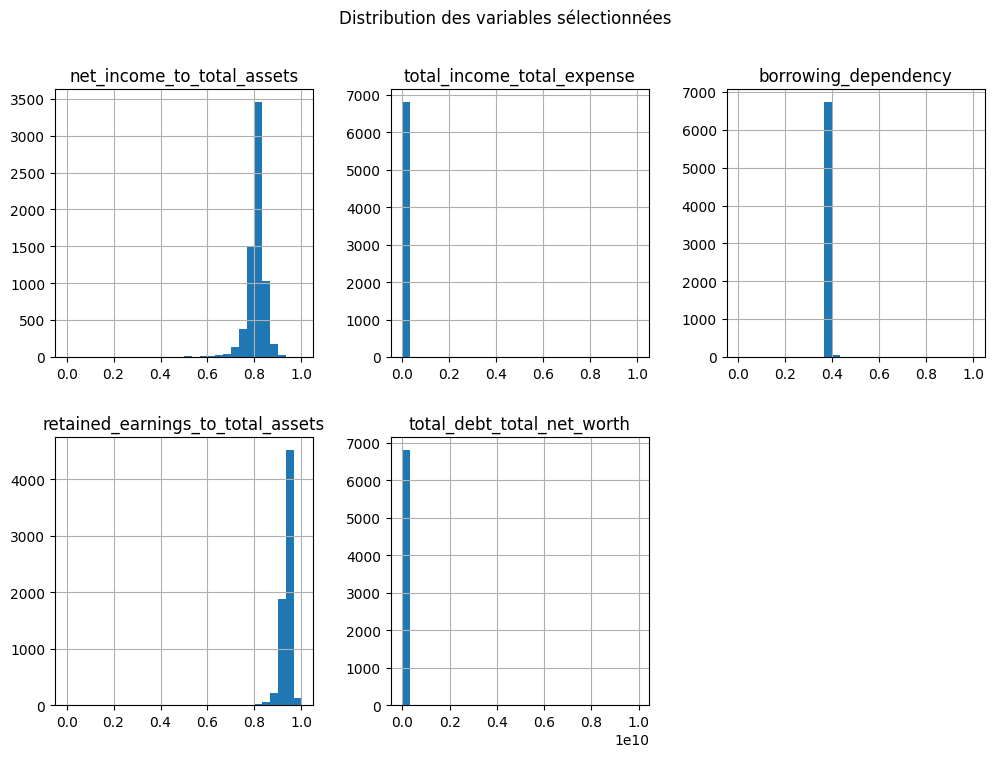

In [ ]:
# Visualisation des distributions (Histogrammes)
plt.figure(figsize=(12, 6))
df_selected.hist(bins=30, figsize=(12, 8), layout=(2, 3))
plt.suptitle("Distribution des variables s√©lectionn√©es")
plt.show()

**Interpretation**


*   **Net Income to Total Assets** : La majorit√© des entreprises ont un ratio compris entre 0.75 et 0.85, ce qui montre une forte concentration autour d‚Äôune rentabilit√© stable.

*   **Total income / Total expense** : La distribution est tr√®s asym√©trique, avec une majorit√© d'entreprises ayant un ratio tr√®s faible.


*   **Borrowing dependency**: La plupart des entreprises ont une d√©pendance aux emprunts concentr√©e autour de 0.37.

*   **Retained Earnings to Total Assets** : La plupart des entreprises financent presque 100% de leurs actifs avec leurs b√©n√©fices.


*   **Total debt / Total net worth** : Cette variable a une dispersion plus large, avec certaines entreprises ayant des niveaux de dette extr√™mement √©lev√©s, ce qui peut indiquer des risques financiers importants.

In [ ]:
# D√©tection des corr√©lations (Evite redondance, identifie les tendances)
correlation_matrix = df_selected.corr()

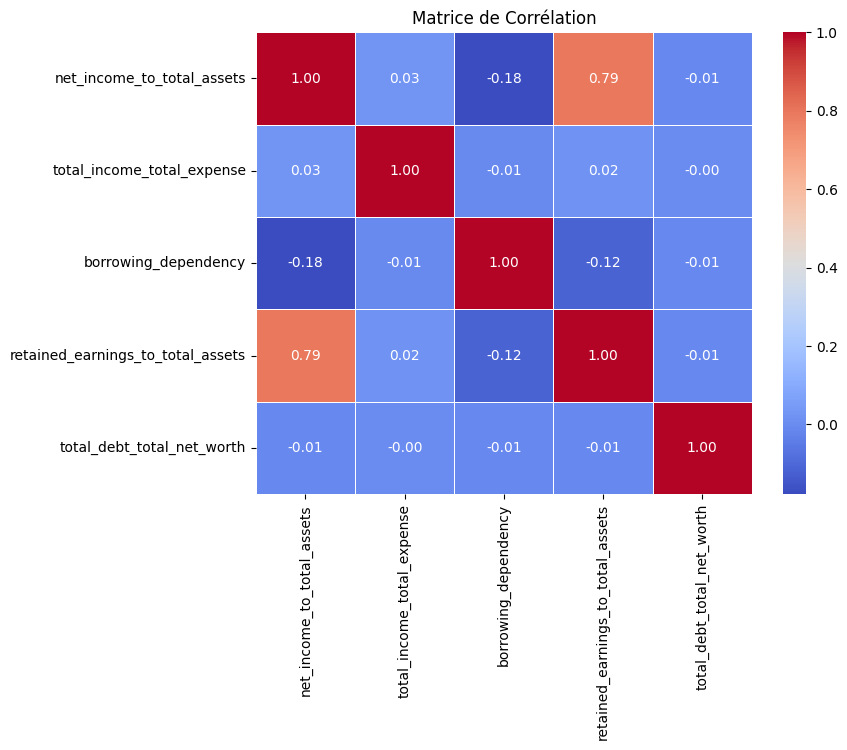

In [ ]:
# Heatmap des corr√©lations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corr√©lation")
plt.show()

<br>**Interpretation**:
<br>**Correlation positive**
<br>(a) Rentabilit√© et B√©n√©fices accumul√©s
<br>r=0.79r = 0.79r=0.79 entre Net_Income_to_Total_Assets et Retained_Earnings_to_Total_Assets
<br>les entreprises rentables r√©investissent une grande partie de leurs b√©n√©fices dans leurs actifs, ce qui renforce leur stabilit√© financi√®re.
<br>

<br>(b) Revenus et Rentabilit√©
<br>r=0.60r = 0.60r=0.60 entre Total_income_Total_expense et Net_Income_to_Total_Assets
<br>Une corr√©lation positive mod√©r√©e sugg√®re que les entreprises qui ont un bon contr√¥le de leurs co√ªts (revenus > d√©penses) g√©n√®rent √©galement une rentabilit√© d√©cente par rapport √† leurs actifs
<br>
<br>**Correction n√©gative**
<br>(a) Rentabilit√© et Endettement
<br>r=‚àí0.18r = -0.18r=‚àí0.18 entre Net_Income_to_Total_Assets et Total_debt_Total_net_worth
<br>Une corr√©lation faible n√©gative signifie qu'il existe une relation inverse entre rentabilit√© et niveau d'endettement.
<br>
<br>(b) D√©pendance aux emprunts et B√©n√©fices accumul√©s
<br>r=‚àí0.12r = -0.12r=‚àí0.12 entre Borrowing_dependency et Retained_Earnings_to_Total_Assets
<br>Une l√©g√®re corr√©lation n√©gative indique que les entreprises plus endett√©es peuvent avoir une moins grande accumulation de b√©n√©fices dans leurs actifs.
<br>
<br>(c) D√©pendance aux emprunts et Endettement
<br>r=‚àí0.01r = -0.01r=‚àí0.01 entre Borrowing_dependency et Total_debt_Total_net_worth
<br>Une corr√©lation extr√™mement faible, proche de z√©ro, montre qu‚Äôil n‚Äôy a presque aucune relation entre la d√©pendance aux emprunts et l‚Äôendettement total.
<br><br>
**Recommandation**



*   R√©investir les b√©n√©fices pour r√©duire la d√©pendance aux emprunts.
*   Optimiser la gestion des co√ªts tout en am√©liorant les revenus pour augmenter la rentabilit√©.
*  R√©duire l‚Äôendettement pour plus de flexibilit√© et de stabilit√© financi√®re. üöÄ






## MACHINE LEARNING MODELING

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, f1_score

In [27]:
RANDOM_SEED = 42

Splitting du dataset

In [23]:
y_var = 'bankrupt'
X = df_selected
y = df[y_var]

print(X.shape)
print(y.shape)

(6819, 5)
(6819,)


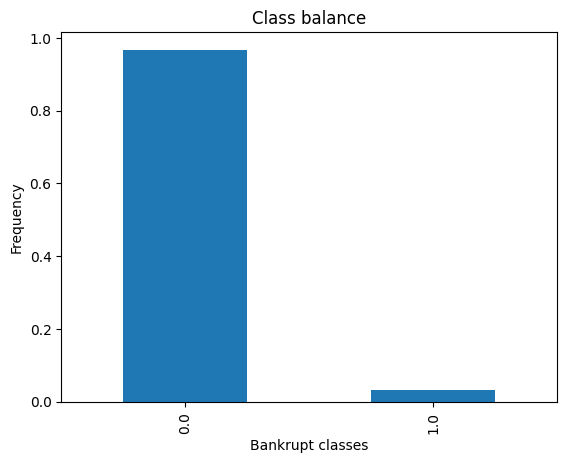

In [24]:
y.value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequency")
plt.title("Class balance");

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4773, 5)
y_train shape: (4773,)
X_test shape: (2046, 5)
y_test shape: (2046,)


### Random Forest Model with GridSearchCV

Model Definition

In [ ]:
clf = RandomForestClassifier()

In [ ]:
param_grid = {
    "n_estimators": range(25, 101, 25),
    "max_depth": range(10, 51, 10)
}

for param, candidates in param_grid.items():
    print(param, list(candidates))

n_estimators [25, 50, 75, 100]
max_depth [10, 20, 30, 40, 50]


In [ ]:
# Default 5-fold CV
model = GridSearchCV(
    clf,
    param_grid=param_grid,
    n_jobs=-1,
)
model

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)})

Entrainement du mod√®le

In [ ]:
model.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)})

√âvaluation des r√©sultats de l'entrainement

In [ ]:
model.best_params_

{'max_depth': 30, 'n_estimators': 75}

In [ ]:
cv_results = pd.DataFrame(model.cv_results_).sort_values("rank_test_score")
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
10       0.781105      0.013816         0.017403        0.000230   
4        0.425235      0.082860         0.015138        0.003642   
15       1.028300      0.025205         0.022257        0.000633   
3        1.077174      0.085497         0.025016        0.005282   
19       1.410793      0.375745         0.029690        0.012517   

    param_max_depth  param_n_estimators  \
10               30                  75   
4                20                  25   
15               40                 100   
3                10                 100   
19               50                 100   

                                    params  split0_test_score  \
10   {'max_depth': 30, 'n_estimators': 75}           0.972775   
4    {'max_depth': 20, 'n_estimators': 25}           0.971728   
15  {'max_depth': 40, 'n_estimators': 100}           0.971728   
3   {'max_depth': 10, 'n_estimators': 100}           0.968586   
19  {'max_depth': 50, 'n_estimators': 100}           0.971728   

    split1_test_score  split2_test_score  split3_test_score  \
10           0.969634           0.971728           0.967505   
4            0.967539           0.971728           0.968553   
15           0.969634           0.970681           0.968553   
3            0.966492           0.971728           0.970650   
19           0.969634           0.970681           0.965409   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
10           0.968553         0.970039        0.001956                1  
4            0.969602         0.969830        0.001681                2  
15           0.966457         0.969410        0.001816                3  
3            0.967505         0.968992        0.001942                4  
19           0.966457         0.968782        0.002441                5

Model Scoring

In [ ]:
acc_test = model.score(X_test, y_test)

print(f"Test accuracy: {round(acc_test , 4)}")

Test accuracy: 0.9648


Matrice de confusion

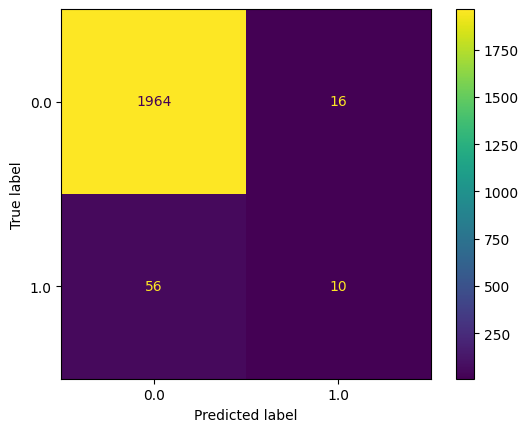

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test
)

Classification Report

In [ ]:
print(classification_report(
    y_test,
    model.predict(X_test)
))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1980
         1.0       0.38      0.15      0.22        66

    accuracy                           0.96      2046
   macro avg       0.68      0.57      0.60      2046
weighted avg       0.95      0.96      0.96      2046



### Deep Learning

In [ ]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model

Model definition

In [ ]:
inputs = Input(shape=(5,))
x = Dense(16, activation="relu")(inputs)
x = Dense(32, activation="relu")(x)
outputs = Dense(1, activation="sigmoid")(x)

net = Model(inputs, outputs)
net.summary()

Model: "functional"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                         ‚îÉ Output Shape                ‚îÉ         Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer (InputLayer)             ‚îÇ (None, 5)                   ‚îÇ               0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense (Dense)                        ‚îÇ (None, 16)                  ‚îÇ              96 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_1 (Dense)                      ‚îÇ (None, 32)                  ‚îÇ             544 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_2 (Dense)                      ‚îÇ (None, 1)                   ‚îÇ              33 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 673 (2.63 KB)

 Trainable params: 673 (2.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
net.compile(optimizer="adam", loss="binary_crossentropy", metrics=[
    "precision",
    "recall",
    "f1_score"
])

Re-split data

In [ ]:
X_val, X2_test, y_val, y2_test = train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_SEED, stratify=y_test)

print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

print("X2_test shape:", X2_test.shape)
print("y2_test shape:", y2_test.shape)

X_val shape: (1023, 5)
y_val shape: (1023,)
X2_test shape: (1023, 5)
y2_test shape: (1023,)


Entrainement du mod√®le

In [ ]:
history = net.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Epoch 1/5
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 12ms/step - f1_score: 0.0563 - loss: 150196.6406 - precision: 0.1733 - recall: 0.0047 - val_f1_score: 0.0627 - val_loss: 0.1211 - val_precision: 1.0000 - val_recall: 0.0303
Epoch 2/5
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 13ms/step - f1_score: 0.0614 - loss: 27774.2598 - precision: 0.7577 - recall: 0.0147 - val_f1_score: 0.0627 - val_loss: 0.1202 - val_precision: 1.0000 - val_recall: 0.0303
Epoch 3/5
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 8ms/step - f1_score: 0.0588 - loss: 17884.6074 - precision: 0.3565 - recall: 0.0048 - val_f1_score: 0.0627 - val_loss: 0.1192 - val_precision: 1.0000 - val_recall: 0.0303
Epoch 4/5
150/150 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - f1_score: 0.0601 - loss: 71959.6484 - precision: 0.1159 - recall: 0.0035 - val_f1_score: 0.0627 - val_loss: 0.1184 - val_precision: 1.0000 - val_

In [ ]:
history.history['precision']

[0.3333333432674408, 0.25, 0.3333333432674408, 0.25, 0.1666666716337204]

In [ ]:
def plot_metric_and_val_metric(history, metric):
    plt.plot(history[metric])
    plt.plot(history[f"val_{metric}"])
    plt.title(f"Model {metric.replace('_', ' ').capitalize()}")
    plt.legend(["train", "val"])

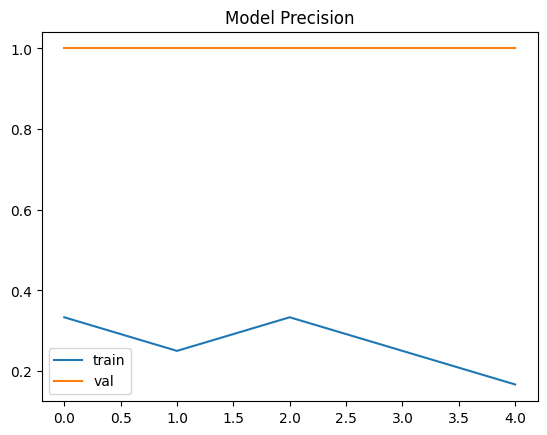

In [ ]:
plot_metric_and_val_metric(history.history, "precision")

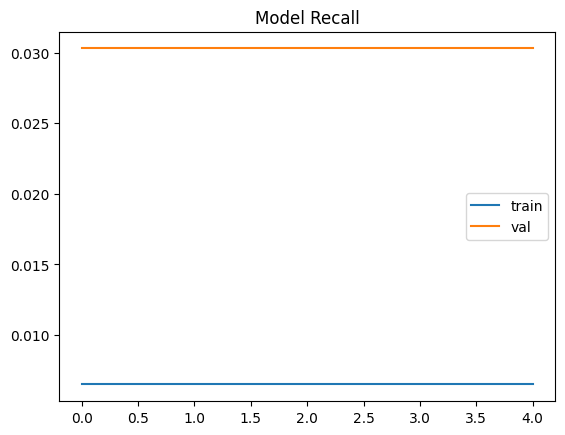

In [ ]:
plot_metric_and_val_metric(history.history, "recall")

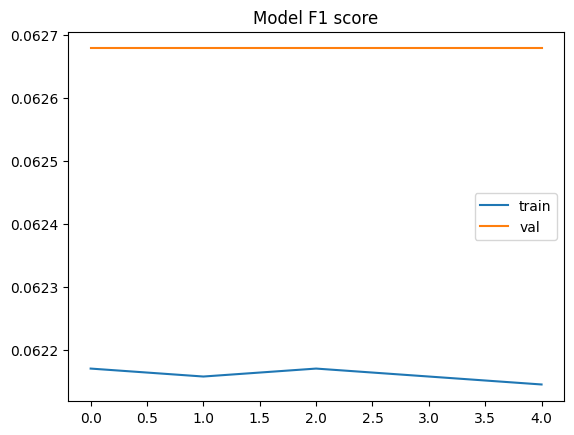

In [ ]:
plot_metric_and_val_metric(history.history, "f1_score")

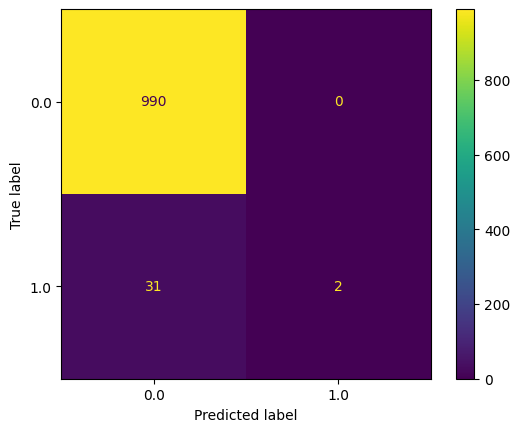

In [ ]:
ConfusionMatrixDisplay.from_predictions(
    y2_test,
    np.round(net(X2_test))
)

Classification Report

In [ ]:
print(classification_report(
    y2_test,
    np.round(net(X2_test))
))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       990
         1.0       1.00      0.06      0.11        33

    accuracy                           0.97      1023
   macro avg       0.98      0.53      0.55      1023
weighted avg       0.97      0.97      0.96      1023

